### Conf

In [8]:
INPUT_PATH="/ADNI/ADNI"
CSV_PATH="/ADNI/ADNI1_Complete_1Yr_1.5T_10_13_2019.csv"
OUTPUT_PATH="/ADNI/bet_rescaled_ADNI"

### Logger

In [9]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

### Pandas

In [10]:
import pandas as pd
import re
import os
df = pd.read_csv(CSV_PATH)

all_files = []
for (dirpath, dirnames, filenames) in os.walk(INPUT_PATH): 
    for f in filenames: 
        if f.endswith("nii"): 
            all_files.append(int(re.split("_|\.", f)[-2][1:]))
all_files = set(all_files)
            
mci_img_ids = list(set(df.loc[df['Group'] == 'MCI']['Image Data ID'].unique()) & all_files)
cn_img_ids = list(set(df.loc[df['Group'] == 'CN']['Image Data ID'].unique())& all_files)
ad_img_ids = list(set(df.loc[df['Group'] == 'AD']['Image Data ID'].unique()) & all_files)

id_lists = {
    "mci" : mci_img_ids, 
    "cn"  : cn_img_ids, 
    "ad"  : ad_img_ids
}

logger.warning(f"MCI images {len(mci_img_ids)}, CN images {len(cn_img_ids)}, AD images {len(ad_img_ids)}")

MCI images 1036, CN images 638, AD images 445


### Imports 

In [11]:
import os
import nipype.interfaces.io as nio
import logging
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nb
from src.preprocess import get_bet_workflow

### Workflow

In [12]:
diagnosis = "ad"
output_dir = os.path.join(OUTPUT_PATH, diagnosis)
iterables = id_lists[diagnosis]
new_shape = (192, 192, 160)
input_path = INPUT_PATH
wf = get_bet_workflow(iterables=iterables,
                      input_path=input_path,
                      output_dir=output_dir,
                      new_shape=new_shape)

200303-17:34:30,657 nipype.workflow INFO:
	 Generated workflow graph: /home/neuro/thesis/graph.png (graph2use=flat, simple_form=True).


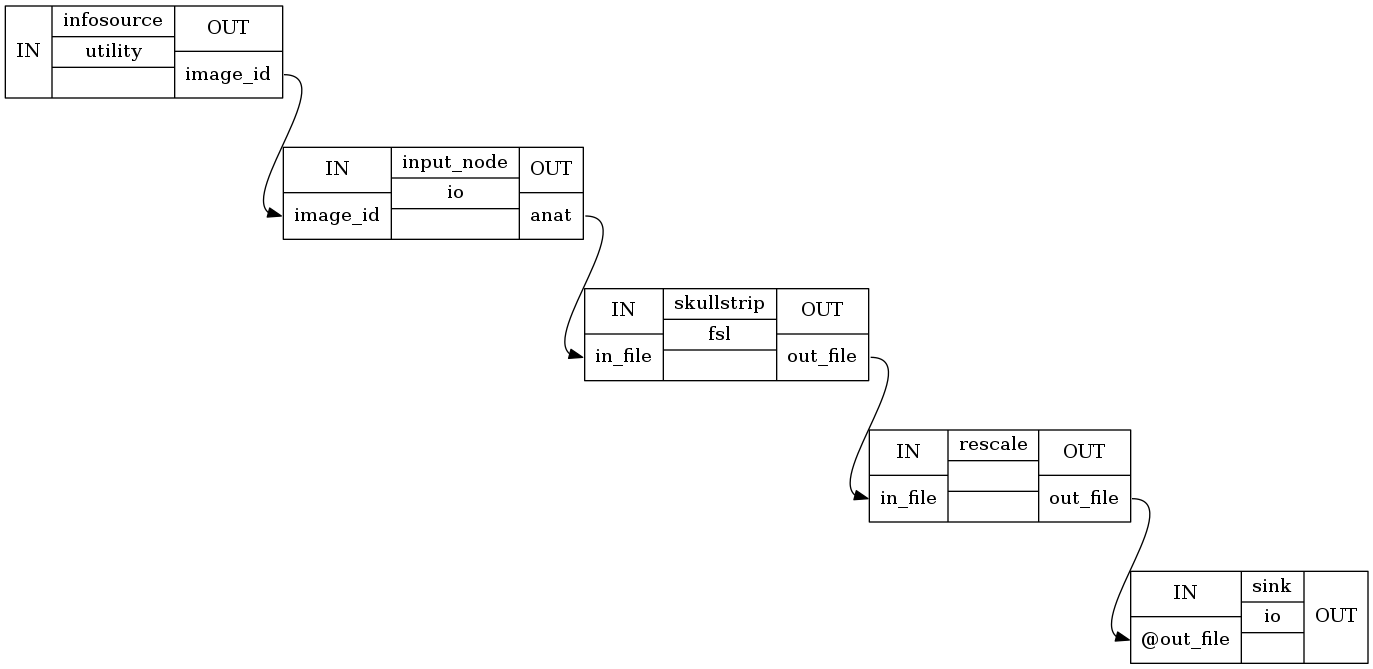

In [13]:
# Create preproc output graph
wf.write_graph(graph2use='flat', format='png', simple_form=True, )
from IPython.display import Image
Image('/home/neuro/thesis/graph_detailed.png')

In [ ]:
%time wf.run(plugin='MultiProc', plugin_args={'n_procs' : 8 , 'memory_gb' : 10})

200303-17:34:31,57 nipype.workflow INFO:
	 Workflow preproc settings: ['check', 'execution', 'logging', 'monitoring']
200303-17:34:35,720 nipype.workflow INFO:
	 Running in parallel.
200303-17:34:35,834 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 445 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 8/8.
200303-17:34:35,934 nipype.workflow INFO:
	 [Node] Setting-up "preproc.input_node" in "/tmp/tmpbp0aashf/preproc/_image_id_118779/input_node".200303-17:34:35,933 nipype.workflow INFO:
	 [Node] Setting-up "preproc.input_node" in "/tmp/tmp_nu9qrtf/preproc/_image_id_118783/input_node".

200303-17:34:35,952 nipype.workflow INFO:
	 [Node] Setting-up "preproc.input_node" in "/tmp/tmpyvys3d52/preproc/_image_id_102387/input_node".200303-17:34:35,954 nipype.workflow INFO:
	 [Node] Setting-up "preproc.input_node" in "/tmp/tmpdmmk0r2k/preproc/_image_id_92146/input_node".

200303-17:34:35,977 nipype.workflow INFO:
	 [Node] Running "input_node" ("nipype.interfaces.io.SelectFil

In [ ]:
!pip install fslpy

In [ ]:
import fsl